## Pandas analysis

This exercise consists in analyzing a dataset containg timing information from a series of Time-to-Digital-Converters (TDC) implemented in a couple of FPGAs. Each measurement (i.e. each row of the input file) consists of a flag that specifies the type of message ('HEAD', which in this case is always 1), two addresses of the TDC providing the signal ('FPGA' and 'TDC_CHANNEL'), and the timing information ('ORBIT_CNT', 'BX_COUNTER', and 'TDC_MEAS'). Each TDC count corresponds to 25/30 ns, whereas a unit of BX_COUNTER corresponds to 25 ns, and the ORBIT_CNT is increased every 'x' BX_COUNTER. This allows to store the time in a similar way to hours, minutes and seconds.

In [1]:
# If you didn't download it yet, please get the relevant file now!
# !wget https://www.dropbox.com/s/xvjzaxzz3ysphme/data_000637.txt -O ~/data/data_000637.txt

In [2]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt

%matplotlib inline

1\. Create a Pandas DataFrame reading N rows of the 'data_000637.txt' dataset. Choose N to be smaller than or equal to the maximum number of rows and larger that 10k.

In [3]:
file_name="/Users/Nicola/data/data_000637.txt"

dataframe = pd.read_csv(file_name)
dataframe

,HEAD,FPGA,TDC_CHANNEL,ORBIT_CNT,BX_COUNTER,TDC_MEAS
0,1,0,123,3869200167,2374,26
1,1,0,124,3869200167,2374,27
2,1,0,63,3869200167,2553,28
3,1,0,64,3869200167,2558,19
4,1,0,64,3869200167,2760,25
...,...,...,...,...,...,...
1310715,1,0,62,3869211171,762,14
1310716,1,1,4,3869211171,763,11
1310717,1,0,64,3869211171,764,0
1310718,1,0,139,3869211171,769,0


2\. Find out the number of BX in a ORBIT (the value 'x').

In [4]:
BX_counter = dataframe['BX_COUNTER']
x = max(BX_counter) - min(BX_counter) +1
print('Number of BX in a orbit:', x)

# when ORBIT_CNT is increased by 1, BX_COUNTER is reset to the minimum
# x is exactly true if in the dataframe there are measures that corresponds to the maximum and the minimum 
# allowed values of BX_counter

Number of BX in a orbit: 3564


3\. Find out how much the data taking lasted. You can either make an estimate based on the fraction of the measurements (rows) you read, or perform this check precisely by reading out the whole dataset.

In [5]:
dataframe.sort_values(['ORBIT_CNT', 'BX_COUNTER', 'TDC_MEAS'])

first_line = dataframe.iloc[0, 3:]
last_line = dataframe.iloc[-1, 3:]

start_time = (first_line['ORBIT_CNT']*x+first_line['BX_COUNTER'])*25+first_line['TDC_MEAS']*25/30
end_time = (last_line['ORBIT_CNT']*x+last_line['BX_COUNTER'])*25+last_line['TDC_MEAS']*25/30

time_required = end_time-start_time

print('The data taking lasted', time_required, 'ns')
print('The data taking lasted', time_required*10**-9, 's')


The data taking lasted 980416093.3125 ns
The data taking lasted 0.9804160933125 s


4\. Create a new column with the absolute time in ns (as a combination of the other three columns with timing information).

In [6]:
dataframe['absolute time'] = (dataframe['ORBIT_CNT']*x+dataframe['BX_COUNTER'])*25+dataframe['TDC_MEAS']*25/30-start_time
dataframe

,HEAD,FPGA,TDC_CHANNEL,ORBIT_CNT,BX_COUNTER,TDC_MEAS,absolute time
0,1,0,123,3869200167,2374,26,0.000000e+00
1,1,0,124,3869200167,2374,27,8.125000e-01
2,1,0,63,3869200167,2553,28,4.476625e+03
3,1,0,64,3869200167,2558,19,4.594125e+03
4,1,0,64,3869200167,2760,25,9.649125e+03
...,...,...,...,...,...,...,...
1310715,1,0,62,3869211171,762,14,9.804161e+08
1310716,1,1,4,3869211171,763,11,9.804161e+08
1310717,1,0,64,3869211171,764,0,9.804161e+08
1310718,1,0,139,3869211171,769,0,9.804163e+08


5\. Replace the values (all 1) of the HEAD column randomly with 0 or 1.

In [7]:
dataframe['HEAD'] = np.random.randint(0, 2, size=(dataframe.shape[0],))
dataframe

,HEAD,FPGA,TDC_CHANNEL,ORBIT_CNT,BX_COUNTER,TDC_MEAS,absolute time
0,1,0,123,3869200167,2374,26,0.000000e+00
1,0,0,124,3869200167,2374,27,8.125000e-01
2,0,0,63,3869200167,2553,28,4.476625e+03
3,1,0,64,3869200167,2558,19,4.594125e+03
4,1,0,64,3869200167,2760,25,9.649125e+03
...,...,...,...,...,...,...,...
1310715,0,0,62,3869211171,762,14,9.804161e+08
1310716,0,1,4,3869211171,763,11,9.804161e+08
1310717,0,0,64,3869211171,764,0,9.804161e+08
1310718,1,0,139,3869211171,769,0,9.804163e+08


6\. Create a new DataFrame that contains only the rows with HEAD=1.

In [8]:
new_dataf = dataframe[dataframe['HEAD']==1]
new_dataf

,HEAD,FPGA,TDC_CHANNEL,ORBIT_CNT,BX_COUNTER,TDC_MEAS,absolute time
0,1,0,123,3869200167,2374,26,0.000000e+00
3,1,0,64,3869200167,2558,19,4.594125e+03
4,1,0,64,3869200167,2760,25,9.649125e+03
6,1,0,61,3869200167,2772,14,9.940000e+03
7,1,0,139,3869200167,2776,0,1.002831e+04
...,...,...,...,...,...,...,...
1310710,1,1,36,3869211171,427,13,9.804077e+08
1310712,1,1,35,3869211171,429,4,9.804078e+08
1310713,1,0,64,3869211171,758,18,9.804160e+08
1310718,1,0,139,3869211171,769,0,9.804163e+08


7\. Make two occupancy plots (one for each FPGA), i.e. plot the number of counts per TDC channel

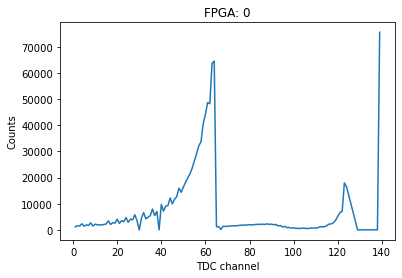

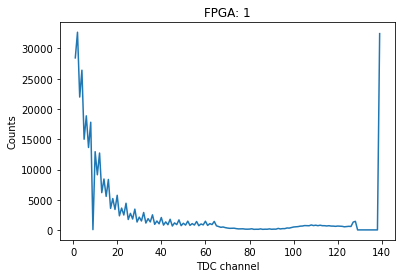

In [9]:
data_FPGA_0 = dataframe[dataframe['FPGA']==0]
data_FPGA_1 = dataframe[dataframe['FPGA']==1]

unique_TDC_0, counts_TDC_0 = np.unique(data_FPGA_0['TDC_CHANNEL'], return_counts=True)
unique_TDC_1, counts_TDC_1 = np.unique(data_FPGA_1['TDC_CHANNEL'], return_counts=True)

fig0 = plt.plot(figsize = (14, 7))
plt.plot(unique_TDC_0, counts_TDC_0)
plt.title('FPGA: 0')
plt.xlabel('TDC channel')
plt.ylabel('Counts')
plt.show()

fig1 = plt.plot(figsize = (14, 7))
plt.plot(unique_TDC_1, counts_TDC_1)
plt.title('FPGA: 1')
plt.xlabel('TDC channel')
plt.ylabel('Counts')
plt.show()

8\. Use the groupby method to find out the noisy channels, i.e. the TDC channels with most counts (say the top 3)

In [10]:
print('Noisy channels:\n')

dataframe.groupby(['TDC_CHANNEL']).size().sort_values().iloc[-3:].reset_index(name='COUNTS')

# groupby.size() returns the number of rows in each group. In this case
# it returns a Series, not a Dataframe --> reset_index

Noisy channels:



,TDC_CHANNEL,COUNTS
0,63,64642
1,64,66020
2,139,108059


In [11]:
# ANOTHER SOLUTION WITHOUT THE GROUPBY METHOD

unique_TDC, counts_TDC = np.unique(dataframe['TDC_CHANNEL'], return_counts=True)
noisy_channels = unique_TDC[counts_TDC.argsort()[-3:]]

print('Noisy TDC channels:', *noisy_channels)

Noisy TDC channels: 63 64 139



9\. Count the number of unique orbits. Count the number of unique orbits with at least one measurement from TDC_CHANNEL=139

In [12]:
# pd.unique is significantly faster than numpy.unique for long enough sequences. Includes NA values.
unique_ORBITS = pd.unique(dataframe['ORBIT_CNT']) 
print('Number of unique orbits:', len(unique_ORBITS))

unique_ORBITS = pd.unique(dataframe['ORBIT_CNT'][dataframe['TDC_CHANNEL']==139])
print('Number of unique orbits with TDC_CHANNEL = 139:', len(unique_ORBITS))

Number of unique orbits: 11001
Number of unique orbits with TDC_CHANNEL = 139: 10976
